# Método de clasificación automática para detección de apnea de sueño en sonidos de ronquidos 

La clasificación automática es una técnica en la cual se organizan los datos en un determinado número de clases o categorías. En esta técnica se debe asegurar una correcta elección de las posibles categorías para lograr sistema con buen desempeño y claridad en su tarea. <br>

En la clasificación automática también se encuentra un modelo para el sistema, el cual en este caso es un modelo de clasificación, el cual va a predecir la clasificación de nuevos datos en las categorías definidas a partir de los aprendido en los datos dados. <br>

Existen varios tipos de métodos de clasificación automática, entre los que destacan: regresión logística, Bayes ingenuo, KNN, árbol de decisión y máquina de soporte vectorial. Aparte de estos existen otros tipos de métodos de clasificación que de acuerdo a la aplicación que se desea implementar pueden ser ideales.

Por otro lado, la apnea del sueño consiste en el bloqueo de las vías respiratorias mientras se duerme, debido al relajamiento intermitente de las vías respiratorias. En la apnea, el flujo de aire en las vías respiratorias se reduce drásticamente o se detiene durante un período mayor a 10 segundos. El síntoma más común son los ronquidos, afectando de un 70% a un 95% de los pacientes diagnosticados. Sin embargo, la presencia de ronquidos no implica directamente que se padezca de apnea, pues los ronquidos son muy comunes en la población. <br>

Por esto, la detección de la apnea es un proceso que comúnmente requiere de mucho tiempo y análisis de los patrones de sueño y ronquidos. Se proponen desarrollar métodos de clasificación automática que clasifiquen a los pacientes en dos categorías: 'Apnea' y 'No apnea', de acuerdo a si se detecta el padecimiento o no. <br>

Para realizar esto, se toman una serie de datos de cinco parámetros, los cuales se ha demostrado que tienen relación con la presencia de apnea. En aplicaciones de la vida real, los datos correspondientes para estos parámetros pueden ser obtenidos a partir de audios reales de ronquidos en pacientes, sin embargo, para este caso, se genera una lista de datos aleatorios en rangos aceptados para cada parámetro. <br>

Los cinco parámetros mencionados son: 
- Mel-Cepstability: es una medida de la estabilidad del espectro durante la señal de audio.
- Varianza: es la medida de la varianza de la energía de los grupos de ronquidos que ocurren muy seguidos. Tiene el fin de cuantificar la variabilidad entre ronquidos a lo largo del tiempo. 
- Razón de fase apneica: cantidad de grupos de ronquidos con una varianza superior un valor establecido empíricamente.
- Silencio entre eventos: un evento de apnea se puede caracterizar por medio de un silencio, causado por el paro en la respiración, entre eventos de ronquidos. 
- Densidad de tono: es la medida de la estabilidad en la frecuencia aproximada de vibración del tejido de las vías respiratorias.

Fueron generados 100 datos, de los cuales 70 son usados para el aprendizaje y 30 para la evaluación de cada uno de los métodos de clasificación automática. Estos datos generados, se almacenan en archivos en formato CSV. En la siguiente tabla se observa un ejemplo de los datos generados:

|   Caso   | Mel-Cepstability | Varianza | Razón de fase apneica | Silencio entre eventos | Densidad de tono | Categoría |
|:--------:|:----------------:|:--------:|:---------------------:|:----------------------:|:----------------:|:---------:|
|     1    |      0.24347     |  1.13782 |        0.18532        |        241.77215       |      0.06276     |  No apnea |
|     2    |      0.08455     |  0.37865 |        0.37664        |        203.31763       |      0.71257     |   Apnea   |
| $\vdots$ |     $\vdots$     | $\vdots$ |        $\vdots$       |        $\vdots$        |     $\vdots$     |  $\vdots$ |
|    99    |      0.06299     |  0.57277 |        0.53741        |        101.50347       |      0.30629     |   Apnea   |
|    100   |      0.08535     |  0.96800 |        1.26759        |        243.45531       |      0.24079     |  No apnea |

Algunas librerías de Python útiles para leer los datos contenidos en archivos de formato CSV y almacenarlos en arreglos son numpy y genfromtxt. Numpy es necesaria pues los datos se desean guardar en arreglos de tipo np.array. Genfromtxt se usa para leer la información de un archivo de texto.

In [1]:
import numpy as np
from numpy import genfromtxt

Los datos se leen y almacenan en arreglos de tipo np.array. El parámetro 'delimiter' hace referencia al carácter que separa a los datos, el parámetro 'skip header' se usa para que no se lea la primera fila de datos, la cual en este caso incluye los nombres de los parámetros y el parámetro 'dtype' se usa para indicar que se están leyendo datos de tipo string, pues de forma predeterminada se leen datos de tipo int. <br>

Las variables se almacenan de la siguiente forma: <br>
- La variable 'data_gen' contiene los datos generados que van a ser usados para el aprendizaje. <br>
- La variable 'cat_gen' contiene las categorías asignadas a los datos contenidos en 'data_gen' que serán usadas para el aprendizaje. <br>
- La variable 'data_try' contiene los datos generados que van a ser usados para la evaluación del sistema. <br>
- La variable 'cat_try' contiene las categorías asignadas a los datos contenidos en 'data_try' que serán usadas para la evaluación del desempeño de los algoritmos. <br>

In [2]:
data_gen = genfromtxt('DatosAprendizaje.csv', delimiter=',', skip_header = 1)
cat_gen = genfromtxt('CategoríasAprendizaje.csv', delimiter = ';', dtype=str)


data_try = genfromtxt('DatosPrueba.csv', delimiter=',', skip_header = 1)
cat_try = genfromtxt('CategoríasPrueba.csv', delimiter = ';', dtype=str)

## Bayes Ingenuo con distribución gaussiana

El método de Bayes ingenuo se basa en el teorema de Bayes y se parte de la suposición que las características que se analizan en los datos para su clasificación son independientes, es decir, no tienen relación entre sí. <br>

El teorema de Bayes permite calcular la probabilidad condicional de un evento A dado un evento B: P(A|B). Esta descrito por la siguiente ecuación: 

 $$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


Este método es útil para múltiples aplicaciones de la vida real debido a su simplicidad, pues se requiere una menor cantidad de datos para que el sistema aprenda el comportamiento. 

>Para este método se usa la libreria GaussianNB de sklearn.naive_bayes. <br>
>
>En la variable 'bayes' el algoritmo realiza el aprendizaje a partir de los datos y categorías proporcionados.<br>


In [3]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(data_gen, cat_gen) 

GaussianNB()

>En la variable 'pred1' se almacenan las predicciones realizadas por el método de clasificación automática.

In [4]:
pred1 = bayes.predict(data_try)   

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'n', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [5]:
n = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred1[i-1]:
        n = n + 1     
print(n) 

22


>Se obtienen 22 predicciones correctas. <br>
>
>Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

## k-NN 

El método k-NN o k vecinos más cercanos no genera ningún modelo a partir de los datos de entrenamiento que le son proporcionados, si no que realiza el aprendizaje hasta el momento en el que se le proporciona nueva información para clasificar. <br>

El funcionamiento de este método es simple, para cada nuevo dato a clasificar, se calcula la distancia con respecto a los datos de entrenamiento y se seleccionan los *k* datos más cercanos. La categoría del nuevo dato será la categoría de los *k* datos más cercanos a este. El valor de *k* debe ser definido de acuerdo a las necesidades de la aplicación a implementar, siendo comúnmente un número pequeño

>Para este método se usa la libreria KNeighborsClassifier de sklearn.neighbors. <br>
>
>En la variable 'vecinos' el algoritmo conserva los datos y categorías proporcionados, a partir de los cuales realizará la clasificación de nuevos datos.<br>
>
>El párametro 'n_neighbors' corresponde al número de vecinos *k* que se tomarán en cuenta para la clasificación automática. En este caso, se usan 18 pues se encontró que es el valor óptimo, sin embargo, se pueden probar otros valores para observar el cambio en el desempeño.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

vecinos = KNeighborsClassifier(n_neighbors=18)
vecinos = vecinos.fit(data_gen, cat_gen)

>En la variable 'pred2' el método de clasificación automática almacena las predicciones realizadas para las categorías de los datos de prueba.

In [7]:
pred2 = vecinos.predict(data_try)

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'd', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [8]:
d = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred2[i-1]:
        d = d + 1     
print(d) 

23


>Se obtienen 23 predicciones correctas. <br>
>
>Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

## Árbol de decisión 

El árbol de decisión es un método que genera una serie de reglas o consideraciones que permiten clasificar los datos. Es un método fácil de entender y visualizar, sin embargo, es sensible a cambios en los datos, pues puede que si intenta clasificar datos muy diferentes las reglas establecidas ya no apliquen correctamente.

> Para este método se usa la librería tree de sklearn. <br>
>
> En la variable 'arbol' el algoritmo realiza el aprendizaje a partir de los datos y categorías proporcionados.<br>

In [9]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(data_gen,cat_gen)

>En la variable 'pred3' el método de clasificación automática almacena las predicciones realizadas para las categorías de los datos de prueba.

In [10]:
pred3 = arbol.predict(data_try)

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'm', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [11]:
m = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred3[i-1]:
        m = m + 1 
            
print(m) 

22


>Se obtienen 22 predicciones correctas.
>
>Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

Para este método, además es posible observar el árbol de decisión que fue generado por el algoritmo. Esto se realiza usando la librería Matplotlib, la cual permmite la graficación. 
Se usa el comando 'tree.plot'.

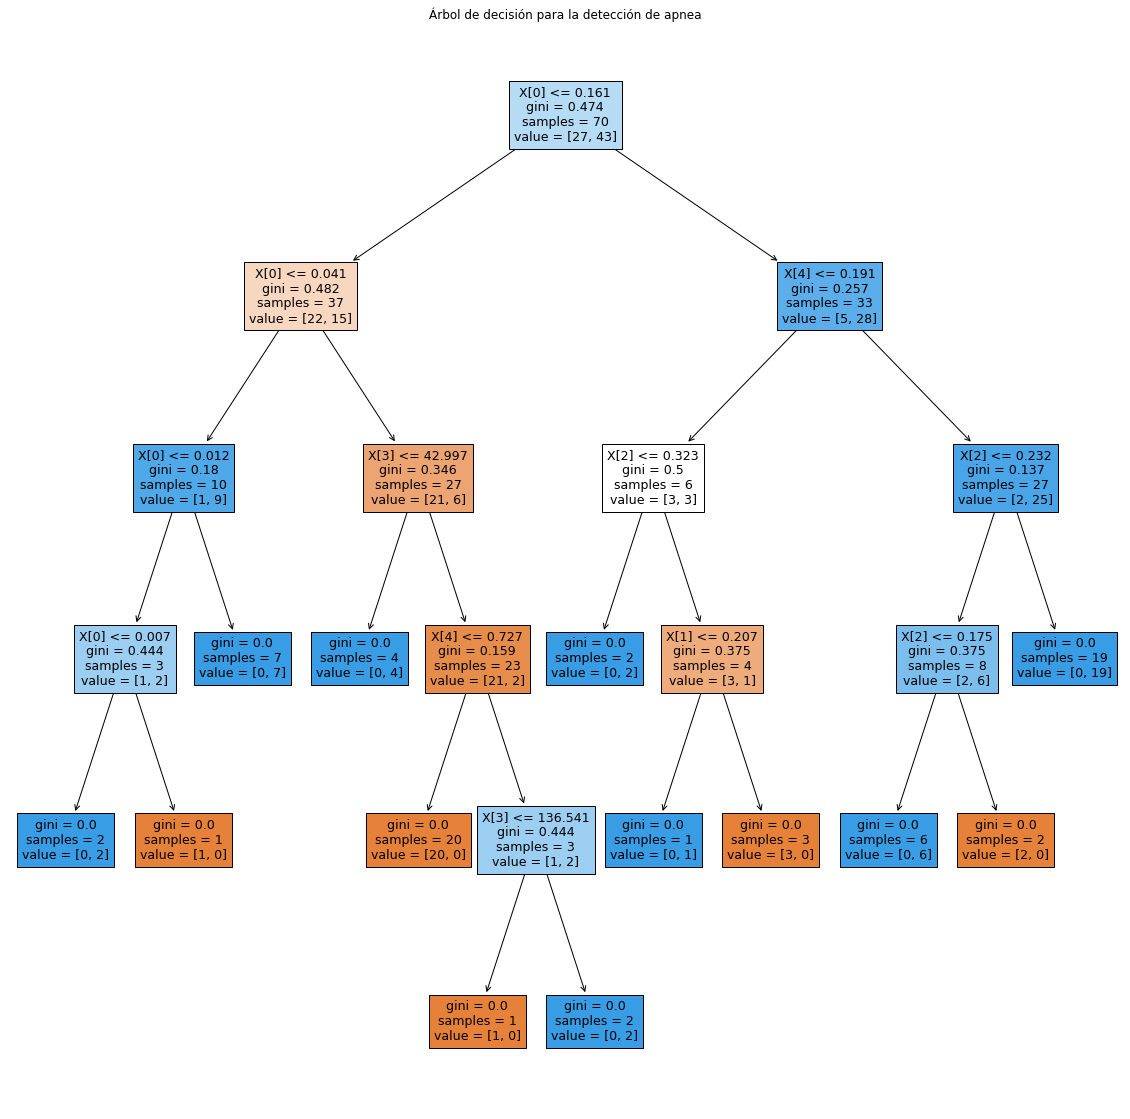

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(arbol, filled=True)
plt.title("Árbol de decisión para la detección de apnea")
plt.show() 

## Máquina de soporte vectorial 

La máquina de soporte vectorial es un método en el cual el sistema a partir de los datos de entrenamiento define un modelo que consiste en representar los datos como puntos en un espacio, separando las categorías de los espacios por medio de hiperplanos. Cuando se analizan nuevos datos, estos son clasificados en las categorías de acuerdo al espacio en el que sean colocados.

> Para este método se usa la librería svm de sklearn. <br>
>
> En la variable 'vector' el algoritmo realiza el aprendizaje a partir de los datos y categorías proporcionados. Se toman en cuenta parámetros como "kernel" y "gamma" para realizar un mejor ajuste del modelo y lograr un mejor desempeño.<br>

In [13]:
from sklearn import svm

vector = svm.NuSVC(kernel='linear', gamma='auto')
vector = vector.fit(data_gen, cat_gen)

>En la variable 'pred4' el método de clasificación automática almacena las predicciones realizadas para las categorías de los datos de prueba.

In [14]:
pred4 = vector.predict(data_try)

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'q', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [15]:
q = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred4[i-1]:
        q = q + 1     
print(q) 

23


>Se obtienen 23 predicciones correctas.
>
>Esto corresponde a un desempeño muy aceptable para un método de clasificación automática.

Como este método consiste en la representación de los datos como puntos en un espacio separados en hiperplanos, es razonable realizar la graficación de este conjunto de puntos. Sin embargo, para el caso de análisis sería difícil de visualizar pues en los datos se cuenta con 5 parámetros y la graficación se realiza en relación a dos parámetros. Sería posible elegir dos de estos, pero no tendría justificación, pues todos los parámetros tienen la misma importancia.

### Regresión Logística 

En la regresión logística se clasifica a los datos en las categorías de acuerdo a la probabilidad que existe en relación a una variable independiente. Los objetivos principales de este método de clasificación son estimar la influencia que tienen las variables independientes en la probabilidad de ocurrencia de los sucesos descritos en las categorías del modelo y encontrar un modelo que describa correctamente la relación entre las variables independientes y los sucesos.

> Para este método se usa la librería LogisticRegression de sklearn.linear.model. <br>
>
> En la variable 'regresion' el algoritmo realiza el aprendizaje a partir de los datos y categorías proporcionados.
Se toman en cuenta parámetros como "solver" y "C" para ajustar de mejor forma el modelo y lograr un mejor desempeño.<br>

In [16]:
from sklearn.linear_model import LogisticRegression
regresion = LogisticRegression(random_state=0, solver='liblinear', C=0.7).fit(data_gen, cat_gen)

>En la variable 'pred5' el método de clasificación automática almacena las predicciones realizadas para las categorías de los datos de prueba.

In [17]:
pred5 = regresion.predict(data_try)

Para evaular rápidamente el desempeño del algoritmo, se crea el contador 'f', el cual va a contar la cantidad de predicciones correctas realizadas por el método de clasificación automática.

In [18]:
f = 0
for i in range(len(cat_try)): 
    if cat_try[i-1] == pred5[i-1]:
        f = f + 1     
print(f) 

20


Se obtienen 20 predicciones correctas.

Esto corresponde a un desempeño aceptable para un método de clasificación automática.

# Métodos de evaluación de métodos de clasificación automática

Una vez que se han generado modelos mediante los métodos de clasificación automática, es importante verificar si estos modelos realmente funcionan y si lo hacen, verificar la precisión con la que son capaces de predecir resultados. Esto se realiza aplicando sistemas de evaluación en los modelos encontrados, mediante los cuales es posible cuantificar la precisión de las predicciones realizadas por el modelo. El uso de sistemas de evaluación es de gran importancia en cualquier aplicación, pues se debe verificar que el desempeño del modelo es óptimo. <br>

Existen numerosos sistemas de evaluación, sin embargo, entre los más comunes destacan: matriz de confusión, exactitud, precisión, recall, especificidad, puntuación F1 y curvas ROC.

Para el estudio de los métodos de evaluación, es importante tomar en cuenta los posibles resultados de aciertos y desaciertos en la clasificación automática. Se pueden presentar cuatro posibles casos: 

- Verdadero positivo (TP): predicciones clasificadas como positivas correctamente (se clasifica Apnea correctamente). 
    
- Falso positivo (FP): predicciones clasificadas como positivas cuando eran negativas (se clasifica Apnea y era No apnea). 
    
- Verdadero negativo (TN): predicciones clasificadas como negativas correctamente (se clasifica No apnea correctamente). 
    
- Falso negativo (FN): predicciones clasificadas como negativas cuando eran positivas (se clasifica No apnea y era Apnea).

## Reporte de clasificación

El reporte de clasificación se usa para obtener varios métodos de evaluación en una misma instrucción. 
Los métodos de evaluación que se obtienen son: 
- Precisión: se dividen el total de predicciones positivas (Apnea) correctas entre el total de predicciones positivas. En cierta forma, se calcula la tasa en la cual el modelo está en lo correcto al dar un resultado positivo. 

$$Precisión: \frac{TP}{TP+FP}$$

- Recall: se divide el total de predicciones clasificadas como positivas (Apnea) correctamente entre el total de predicciones que debían ser clasificadas como positivas. En cierta forma, es como calcular la tasa de predicciones positivas que fueron clasificadas correctamente. 

$$ Recall = \frac{TP}{TP+FN}$$

- Puntuación F1: métrica que deriva de la combinación de las métricas precisión y recall. Un buen modelo va a tener una alta puntuación F1.

$$ F1 = \frac{2 \cdot Precisión \cdot Recall}{Precisión + Recall}$$

Estos valores son obtenidos para cada una de las categorías del método. 

> El reporte de clasificación se obtiene de la librería classification_report de sklearn.metrics
>
> Se usa la instrucción *classification_report(categorías correctas, categorías predichas)*.

In [19]:
from sklearn.metrics import classification_report

### Bayes ingenuo con distribución gaussiana

In [20]:
 print(classification_report(cat_try, pred1))

              precision    recall  f1-score   support

       Apnea       0.69      0.69      0.69        13
    No apnea       0.76      0.76      0.76        17

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30



### k-NN

In [21]:
 print(classification_report(cat_try, pred2))

              precision    recall  f1-score   support

       Apnea       0.71      0.77      0.74        13
    No apnea       0.81      0.76      0.79        17

    accuracy                           0.77        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.77      0.77      0.77        30



### Árbol de decisión

In [22]:
 print(classification_report(cat_try, pred3))

              precision    recall  f1-score   support

       Apnea       0.65      0.85      0.73        13
    No apnea       0.85      0.65      0.73        17

    accuracy                           0.73        30
   macro avg       0.75      0.75      0.73        30
weighted avg       0.76      0.73      0.73        30



### Máquina de soporte vectorial

In [23]:
 print(classification_report(cat_try, pred4))

              precision    recall  f1-score   support

       Apnea       0.80      0.62      0.70        13
    No apnea       0.75      0.88      0.81        17

    accuracy                           0.77        30
   macro avg       0.78      0.75      0.75        30
weighted avg       0.77      0.77      0.76        30



### Regresión logística

In [24]:
 print(classification_report(cat_try, pred5))

              precision    recall  f1-score   support

       Apnea       0.80      0.31      0.44        13
    No apnea       0.64      0.94      0.76        17

    accuracy                           0.67        30
   macro avg       0.72      0.62      0.60        30
weighted avg       0.71      0.67      0.62        30



Se observa que en general, todos los métodos tienen un buen desempeño en la detección de apnea. 

## Curvas ROC

Una curva ROC (del inglés Receiver Operating Characteristic) mide el desempeño del modelo con respecto a falsos positivos (FP) y verdaderos positivos (TP). En estas gráficas, el eje *x* son los FP, el *y* los TP y la diagonal se considera como un modelo generado de forma aleatoria. Así, si un modelo realiza predicciones de forma perfecta la curva ROC se ubicará en la parte superior izquierda, donde FP = 0 (ninguno) y TP = 1 (todos). <br>

Usando la curva ROC se puede encontrar también el área bajo la curva (AUC, area under the curve) que también sirve como métrica del desempeño del modelo. El AUC puede tomar valores en 0.5 y 1. En general: 
- si se obtiene un AUC menor que 0.7, se tiene un mal modelo
- si se obtiene un AUC entre 0.7 y 0.97 se tiene un buen modelo 
- si se obtiene un AUC mayor que 0.97, se tiene un excelente modelo

> La curva ROC y el AUC se obtienen de la librería *metrics* de sklearn. Además, se necesita de la librería matplotlib.
>
> Se usa la instrucción *metrics.plot_roc_curve(modelo, datos de entrada, categorías de entrada, pos_label="Categoría Positiva", name="Curva ROC...")*, seguido de la instrucción *plt.show()*.

In [25]:
from sklearn import metrics

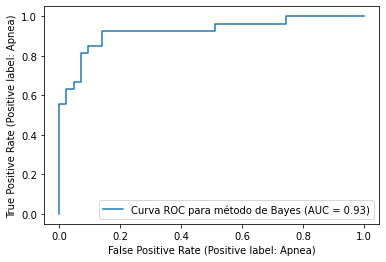

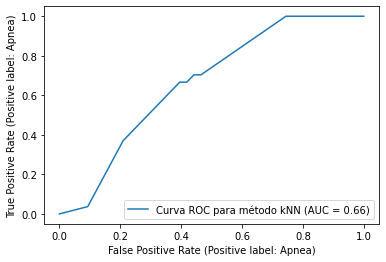

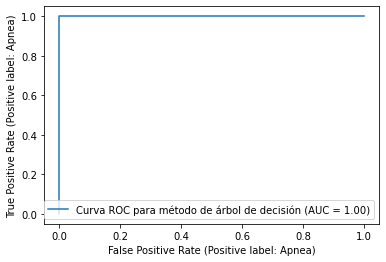

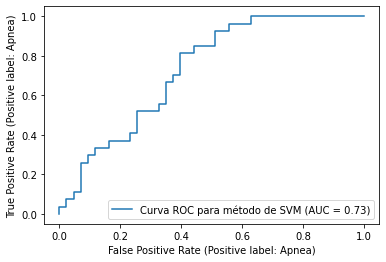

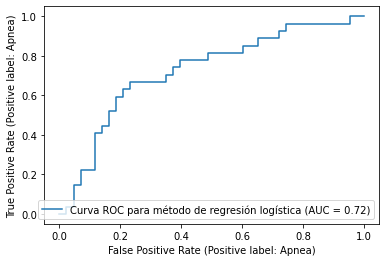

In [26]:
# Para método de Bayes
metrics.plot_roc_curve(bayes, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de Bayes")  
plt.show()

# Para método kNN
metrics.plot_roc_curve(vecinos, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método kNN")  
plt.show()

# Para método de árbol de decisión
metrics.plot_roc_curve(arbol, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de árbol de decisión")  
plt.show()

# Para método de máquina de soporte vectorial (SVM)
metrics.plot_roc_curve(vector, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de SVM")  
plt.show()

# Para método de regresión logística
metrics.plot_roc_curve(regresion, data_gen, cat_gen, pos_label="Apnea", name="Curva ROC para método de regresión logística")  
plt.show()

Se observa que los modelos obtenidos son buenos, siendo el mejor, el modelo obtenido por medio del método de clasificación de Bayes ingenuo.